# Tree plotting with `toytree`

``Toytree`` is a Python tree plotting library designed for use inside 
[jupyter notebooks](http://jupyter.org) to create both quick and easy
tree plots and advanced publication-quality figures. Its genesis was motivated
from a desire for a simple and elegant tree plotting library in ``Python`` 
with a design similar to the ``'ape'`` package for ``R``. For its backend
``toytree`` uses a stripped-down version of the [ete3](http://etetoolkit.org) library to parse and manipulate tree objects, and it uses the minimalist plotting library 
[toyplot](http://toyplot.readthedocs.io/en/stable/index.html) to generate trees as graph figures. 



In [1]:
import toyplot
import numpy as np
import toytree


In [2]:
print "toyplot v.{}".format(toyplot.__version__)
print "toytree v.{}".format(toytree.__version__)

toyplot v.0.14.0-dev
toytree v.0.0.1


### Example data
For the examples in this notebook we will examine two trees. The first is represented in <span style="color:rgba(20%,65%,65%)"><b>Newick format</b></span> with edge lengths and support values (ete tree format 0), and the second is represented in <span style="color:rgba(98%,55%,38%)"><b>extended Newick format</b></span> (NHX; ete tree format 8). You can access, manipulate, and plot data stored from both types of trees.

In [3]:
## unrooted ML tree from `raxml` analysis with edge-lengths & bs supports
newick = \
"""(41954_cyathophylloides:0.00008888031167776559,(((32082_przewalskii:
0.00259326350604092027,33588_przewalskii:0.00247133969857381459)100:
0.03587422609749137820,(33413_thamno:0.00565358258838428562,(30556_thamno:
0.00653218253974622003,((40578_rex:0.00335406134690998791,35855_rex:
0.00339963302433546593)100:0.00222999650239191338,(35236_rex:0.00580524693403740473,
(39618_rex:0.00096208118162745867,38362_rex:0.00109218434613194098)100:
0.00617527349892385037)96:0.00073890038051916795)99:0.00078336549990502716)100:
0.00103379657491441167)100:0.00538723112354794632)100:0.00297626149201316807,
(29154_superba:0.00634236826447889986,30686_cyathophylla:0.00669944988923529706)
100:0.00237994755604001816)100:0.00941020878048287081,41478_cyathophylloides:
0.00005282184335845886);"""

In [4]:
## unrooted species tree from a `tetrad` analysis with meta-information as NHX
nhx = \
"""((33588_przewalskii:100[&&NHX:quartets_sampled=0],32082_przewalskii:100
[&&NHX:quartets_sampled=0])100:100[&&NHX:quartets_sampled=55],(33413_thamno:
100[&&NHX:quartets_sampled=0],((35236_rex:100[&&NHX:quartets_sampled=0],
30556_thamno:100[&&NHX:quartets_sampled=0])91:91[&&NHX:quartets_sampled=55],
((35855_rex:100[&&NHX:quartets_sampled=0],40578_rex:100[&&NHX:quartets_sampled=0])
100:100[&&NHX:quartets_sampled=55],(38362_rex:100[&&NHX:quartets_sampled=0],
39618_rex:100[&&NHX:quartets_sampled=0])100:100[&&NHX:quartets_sampled=55])
64:64[&&NHX:quartets_sampled=216])100:100[&&NHX:quartets_sampled=315])100:
100[&&NHX:quartets_sampled=315],((30686_cyathophylla:100[&&NHX:quartets_sampled=0]
,29154_superba:100[&&NHX:quartets_sampled=0])100:100[&&NHX:quartets_sampled=55],
(41954_cyathophylloides:100[&&NHX:quartets_sampled=0],41478_cyathophylloides:
100[&&NHX:quartets_sampled=0])100:100[&&NHX:quartets_sampled=55])100:100
[&&NHX:quartets_sampled=216]);"""

### Load a Toytree object

In [5]:
tre = toytree.tree(newick)
tre.root(wildcard="prz")
tre.draw();

32082_przewalskii 33588_przewalskii 29154_superba 30686_cyathophylla 41478_cyathophylloides 41954_cyathophylloides 33413_thamno 30556_thamno 40578_rex 35855_rex 35236_rex 39618_rex 38362_rex

### Plot tree with edge lengths and support values

In [8]:
## plot tree with edge length & support values
tre = toytree.tree(newick)
tre.root(wildcard="prz")
tre.draw(width=500, height=300, 
         use_edge_lengths=True, 
         node_labels=tre.get_node_values("support"),
         );

100 100 100 100 100 100 100 99 100 96 100 32082_przewalskii 33588_przewalskii 29154_superba 30686_cyathophylla 41478_cyathophylloides 41954_cyathophylloides 33413_thamno 30556_thamno 40578_rex 35855_rex 35236_rex 39618_rex 38362_rex

### Plot unrooted tree with values as edge labels
This super tree was inferred by quartet-joining of all possible quartets that could be inferred from 13 taxa (715). For each edge of the tree the subtending node indicates the number of quartets that were informative about that edge (split) in the tree. Splits nested further from the tips necessarily have more quartets providing information. You can access "features" from nodes of the NHX tree in the order they will be plotted by using the ``.get_node_values()`` function and providing the name of the feature (e.g., "quartets_sampled" or "support"). In this case we force the tree to be rooted on "przewalskii" and so we apply a bootstrap 

In [9]:
## load the unrooted NHX tree
tre = toytree.tree(nhx)

## draw the tree without node labels
canvas, axes = tre.draw(
    width=400, 
    height=300, 
    node_labels=False,
    );

## add text labels to edges using vertices locations
axes.text(
    tre.verts[:, 0], tre.verts[:, 1], 
    tre.get_node_values("quartets_sampled"), 
    style={
        "-toyplot-anchor-shift": "-15px", 
        "baseline-shift": "8px",
        },
    );

## add text labels to edges using vertices locations
axes.text(
    tre.verts[:, 0], tre.verts[:, 1], 
    tre.get_node_values("support"), 
    style={
        "-toyplot-anchor-shift": "-15px", 
        "baseline-shift": "-10px",
        },
    );

33588_przewalskii 32082_przewalskii 30686_cyathophylla 29154_superba 41954_cyathophylloides 41478_cyathophylloides 33413_thamno 35236_rex 30556_thamno 35855_rex 40578_rex 38362_rex 39618_rex 55 216 55 55 315 315 55 216 55 55 100 100 100 100 100 100 91 64 100 100

Similarly these values could be added to the node labels using the `node_labels` argument to ``draw()``. Here we access each value in the NHX tree object using the ``get_node_values()`` command. In addition to the features explicitly in the NHX string, you can also access any attribute of a node in the ete3.Tree (Toytree.tree) object, such as "name". 

In [10]:
## set up canvas
canvas = toyplot.Canvas(width=900, height=300)
axes1 = canvas.axes(grid=(1, 3, 0), gutter=20)
axes2 = canvas.axes(grid=(1, 3, 1), gutter=20)
axes3 = canvas.axes(grid=(1, 3, 2), gutter=20)

## load in nhx tree
tre = toytree.tree(nhx)

## draw three trees
tre.draw(
    axes=axes1,
    node_labels=tre.get_node_values("name"),
    );

tre.draw(
    axes=axes2,
    node_labels=tre.get_node_values("support"),
    );

tre.draw(
    axes=axes3,
    node_labels=tre.get_node_values("quartets_sampled"),
    );

axes1.show = False
axes2.show = False
axes3.show = False

1 2 3 4 5 6 7 8 9 10 33588_przewalskii 32082_przewalskii 30686_cyathophylla 29154_superba 41954_cyathophylloides 41478_cyathophylloides 33413_thamno 35236_rex 30556_thamno 35855_rex 40578_rex 38362_rex 39618_rex 100 100 100 100 100 100 91 64 100 100 33588_przewalskii 32082_przewalskii 30686_cyathophylla 29154_superba 41954_cyathophylloides 41478_cyathophylloides 33413_thamno 35236_rex 30556_thamno 35855_rex 40578_rex 38362_rex 39618_rex 55 216 55 55 315 315 55 216 55 55 33588_przewalskii 32082_przewalskii 30686_cyathophylla 29154_superba 41954_cyathophylloides 41478_cyathophylloides 33413_thamno 35236_rex 30556_thamno 35855_rex 40578_rex 38362_rex 39618_rex

## The basic toytree Class object
The help documentation for toytree objects can be accessed with `?` or `<tab>-completion`, which I've printed below. 

In [11]:
tre = toytree.tree(newick)
tre

## (re-) rooting a trre
toytree uses an [`ete3.Tree Class object`](http://etetoolkit.org/docs/latest/tutorial/index.html) as its base tree representation object, which can be accessed in the `.tree` attribute. The ete3.Tree object parses the newick file, and toytree accesses information from the parsed tree file. Thus, to modify the tree and its attributes you must modify the .tree (ete3.Tree) object directly. Most of the time this will not be necessary, but for advanced usage it makes sense to describe how the data are stored. 

For the simple purpose of plotting users will rarely need to access the .tree object directly. Thus toytree offers some simpler convenience functions for modifying the tree such as the `.root()` function to re-root the tree, based on entry of either a list of outgroup names, or a wildcard selector of outgroup sample names. 

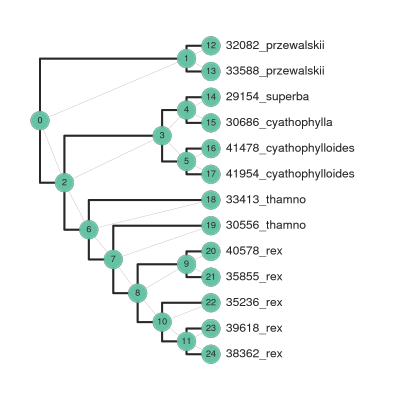

In [11]:
## root the tree (either by entering outgroup names or using a wildcard
tre.root(["32082_przewalskii", "33588_przewalskii"])
tre.root(wildcard="prz")

## draw the tree
canvas, axes = tre.draw(width=400, node_labels=True);
canvas

## Basic tree-plotting
The basis for the `toytree` plotting library is the more generaly plotting library called [`toyplot`](link). A familiarity with toyplot is not required to use toytree, but it will be helpful for understanding how to design advanced panel plots. It is really a wonderful piece of software with great documentation so I highly recommend giving it a look. A major strength of toyplot plots is that they are generated using SVG+HTML, meaning that they natively look good in the web and as vector formatted figures. This also means that adding styling to the figures uses standard web-semantics which will be familiar to anyone who has used CSS styling. In the example below we provide three arguments to `draw()` telling it to add `node_labels`, to make them a given `size`, and to style the nodes according to a dictionary of CSS styles in `node_style`

In [12]:
## create styling dictionary to reuse styles easily
styledict = {
    "node_labels": True,
    "node_size": 16,
    "node_style": {
        "fill": "orange", 
        "opacity": "0.9",
        "stroke": "#262626", 
        "stroke-width": "1.5",
        },
    };

## draw rooted tre with the styledict
tre.draw(width=400, height=400, **styledict);

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 32082_przewalskii 33588_przewalskii 29154_superba 30686_cyathophylla 41478_cyathophylloides 41954_cyathophylloides 33413_thamno 30556_thamno 40578_rex 35855_rex 35236_rex 39618_rex 38362_rex

## Additional styling options

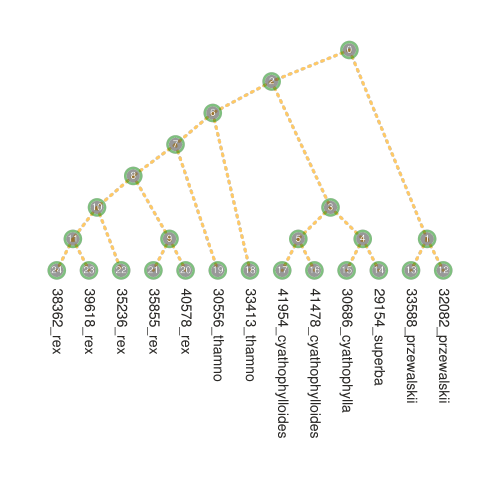

In [14]:
canvas, axes = tre.draw(
    width=500, 
    height=500,
    
    node_labels=True,
    node_labels_style={
        "font-size": "10px", 
        "fill": "white",
        },
    
    node_size=16,
    node_style={
        "stroke": "green", 
        "stroke-width": 2.5, 
        "fill": "#333333", 
        "opacity": 0.5,
        },  
         
    tip_labels=True,
    tip_labels_style={
        "font-size": "14px", 
        "-toyplot-anchor-shift": "18px", 
        "fill": "darkcyan",
        },
         
    edge_style={
        "stroke": "orange", 
        "stroke-opacity": 0.6, 
        "stroke-dasharray": "2,5",
        "stroke-width": 3,
        },
         
    use_edge_lengths=False,
    tree_style="c",
    orient="down",
    );

import toyplot.svg
toyplot.svg.render(canvas, '/home/deren/Documents/toytree/docs/readme_fig2.svg')
canvas

### Embed multiple `toytree` plots inside a  `toyplot` Canvas

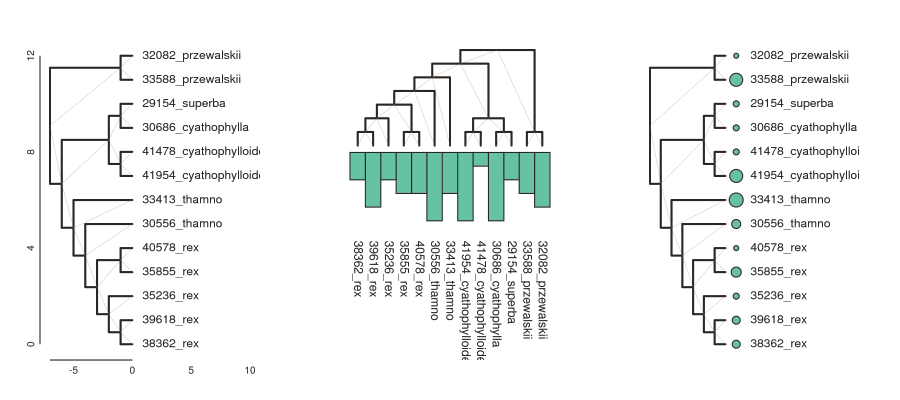

In [15]:
## create a canvas with two subplots
canvas = toyplot.Canvas(width=900, height=400)
axes1 = canvas.cartesian(grid=(1, 3, 0))
axes2 = canvas.cartesian(grid=(1, 3, 1))
axes3 = canvas.cartesian(grid=(1, 3, 2))

## draw a tree into each space by designating the axes
_, axes1 = tre.draw(axes=axes1, orient='right')
_, axes2 = tre.draw(axes=axes2, orient='down', 
                    tip_labels_style={"-toyplot-anchor-shift": "95px"})
_, axes3 = tre.draw(axes=axes3, 
                    tip_labels_style={"-toyplot-anchor-shift": "25px"})

## add more styling to axes
axes1.show = True
axes2.show = False
axes3.show = False

## add additional plots to an axis (use axes.show to see coordinates)
heights = np.random.randint(-5, 0, 13)
axes2.bars(heights, 
           baseline=[-0.5]*13,
           style={"stroke": "#262626"},
           );

heights = np.random.randint(5, 15, 13)
axes3.scatterplot(a=[1]*heights.shape[0], 
                  b=range(heights.shape[0]),
                  size=heights,
                  mstyle={"stroke": "#262626"}
                  );

canvas

## Modify tip labels
The tiplabels can be accessed in the `tiplabels` attribute which will be in the order from top to bottom when the tree is plotting with `orientation='right'`. By default these labels are plotted on the tips of the tree. You can either modify the list in `tree.tiplabels`, or simply create a new list of labels to pass to the `draw` function in the `tip_labels` argument. See http://toyplot.readthedocs.io/en/stable/text.html for the many styling options for text. 

In [16]:
tre.get_tip_labels()

['32082_przewalskii',
 '33588_przewalskii',
 '29154_superba',
 '30686_cyathophylla',
 '41478_cyathophylloides',
 '41954_cyathophylloides',
 '33413_thamno',
 '30556_thamno',
 '40578_rex',
 '35855_rex',
 '35236_rex',
 '39618_rex',
 '38362_rex']

In [17]:
## modify all labels
tiplabels = ["tip-"+tip for tip in tre.get_tip_labels()]

## modify some labels (you can use html tags like <b> for bold)
tiplabels = ["<b>{}</b>".format(tip) if "rex" in tip else tip for tip in tiplabels]

## the 'fill' style will color all tips the same, if you want them to be
## different colors then supply a list with `tip_labels_color`
tipcolors = ["darkcyan" if "prz" not in tip else "orange" for tip in tiplabels]

## draw the tree with tips modified
tre.draw(
    tip_labels=tiplabels,
    tip_labels_color=tipcolors,
    tip_labels_style={"font-size": "12px",
                      "text-anchor":"start", 
                      "-toyplot-anchor-shift":"5px", 
                      "fill": "#292724"}
    );

tip-32082_przewalskii tip-33588_przewalskii tip-29154_superba tip-30686_cyathophylla tip-41478_cyathophylloides tip-41954_cyathophylloides tip-33413_thamno tip-30556_thamno tip-40578_rex tip-35855_rex tip-35236_rex tip-39618_rex tip-38362_rex

## Modify node labels

In [18]:
#node_labels=["" for i in tre.node_labels],
#         node_size=10,
#         node_style={"stroke": "#262626"},
        

## Add (bars, scatterplot) to tree plot

In [19]:
## load tree and root
tre = toytree.tree(newick)
tre.root(wildcard="prz")

## draw tree w/ node labels
canvas, axes = tre.draw(
    width=400,
    height=350,
    node_labels=tre.get_node_values("support"),
    node_labels_style={
        "fill": "262626",
        "font-size": "10px", 
        "-toyplot-anchor-shift": "15px"}, 
    node_size=10,
    tip_labels_style={
        "font-size": "12px", 
        "-toyplot-anchor-shift": "55px"},    
    );

## add tip circle plots
axes.scatterplot(
    a=[1]*13, b=range(13), 
    size=np.random.randint(5, 15, 13), 
    mstyle={"stroke": "#262626"}, 
    );
axes.scatterplot(
    a=[2]*13, b=range(13), 
    size=np.random.randint(5, 15, 13), 
    mstyle={"stroke": "#262626"}, 
    );

100 100 100 100 100 100 100 99 100 96 100 32082_przewalskii 33588_przewalskii 29154_superba 30686_cyathophylla 41478_cyathophylloides 41954_cyathophylloides 33413_thamno 30556_thamno 40578_rex 35855_rex 35236_rex 39618_rex 38362_rex 
 
 
 Save as .csv